This script analyizes the performance of a long/short portfolio I run. It looks at the portfolio's total performance, contribution to performance, correlation & beta vs S&P and oil.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas.io.data as web
from pandas.io.data import DataReader
import matplotlib.pyplot as plt
import datetime
import datetime as dt
import statsmodels.api as sm

%matplotlib inline 

/Users/christopherwaller/anaconda/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
xls_file = pd.ExcelFile('/Users/christopherwaller/Library/Mobile Documents/com~apple~CloudDocs/Last copy of Samsung Laptop files/Documents/Documents/Investment/Avalon/Portfolio.xlsx')
xls_portfolio_sheet = xls_file.parse('Portfolio')
portfolio_sheet = DataFrame(xls_portfolio_sheet)

In [3]:
symbols = list(portfolio_sheet.Ticker)
weights = list(portfolio_sheet.Old_Weights)
leverage = 1.6

Downloading single stock performance

In [4]:
historic_prices = DataFrame()

#gives pricing data since Jan-2010.
for sym in symbols:
    historic_prices[sym] = web.DataReader(sym, data_source='yahoo',
                              start=dt.datetime(2016, 7, 7), end=dt.datetime.now())['Adj Close']
historic_daily_returns = np.log(historic_prices/historic_prices.shift(1))

In [7]:
weighted_returns = historic_daily_returns * weights

Contribution to performance by stock

In [8]:
stock_cum_returns = np.cumsum(weighted_returns).iloc[-1:]
stock_cum_returns

,^GSPC,OIL,NTT,JNJ,HCA,NXTM,GOOGL,CRST.L,BVS.L,TW.L,...,OEC,URI,HP,APC,XEC,SWN,WPX,SM,EPE,GAS.MC
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-28,0,0,-0.004855,-0.003762,0.000124,-0.000817,0.007368,0.015325,0.007314,-0.009201,...,0.005965,0.0154,-0.00159,-0.004317,-0.009302,0.008463,-0.009955,-0.017677,-0.002581,0


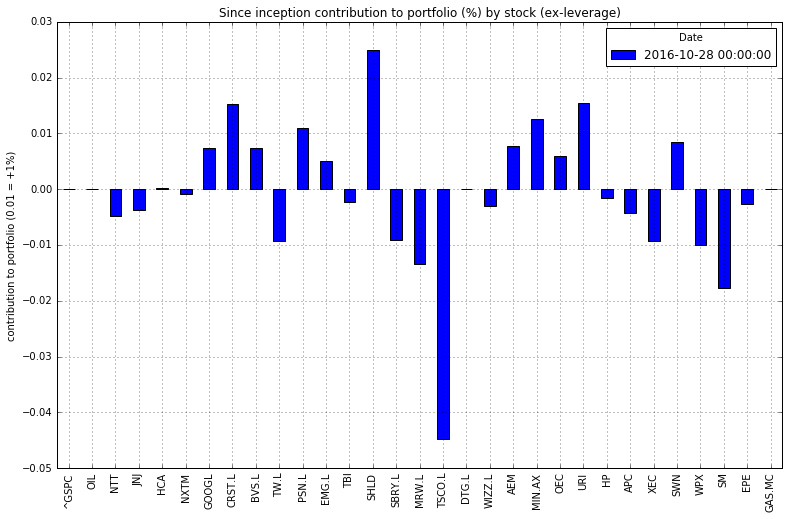

In [9]:
stock_cum_returns.T.plot(kind='bar', figsize=(13, 8)) 
plt.ylabel('contribution to portfolio (0.01 = +1%)')
plt.title('Since inception contribution to portfolio (%) by stock (ex-leverage)')
plt.grid(True)

Portfolio's daily performance history

In [10]:
daily_port_return = DataFrame(weighted_returns.sum(axis=1)*leverage, columns=['Portfolio'])
daily_port_return

,Portfolio
Date,
2016-07-07,0.000000
2016-07-08,-0.004026
2016-07-11,0.019416
2016-07-12,-0.016583
2016-07-13,0.014422
2016-07-14,0.012036
2016-07-15,-0.003655
2016-07-18,-0.020615
2016-07-19,0.008263


In [11]:
np.std(daily_port_return)

Portfolio    0.012554
dtype: float64

Graphing performance of portfolio, S&P and oil

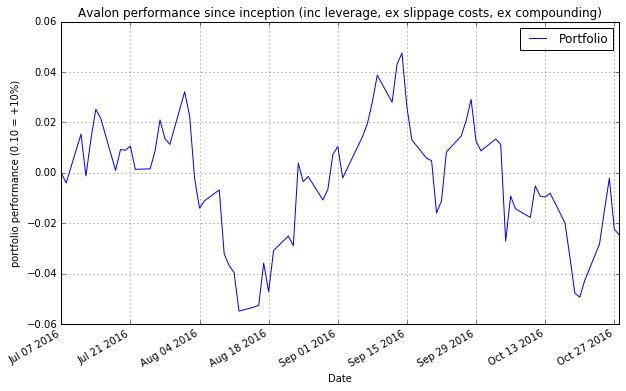

In [12]:
cumulative_portfolio_return = np.cumsum(daily_port_return)
cumulative_portfolio_return.plot(kind='line', figsize=(10, 6))
plt.title('Avalon performance since inception (inc leverage, ex slippage costs, ex compounding)')
plt.ylabel('portfolio performance (0.10 = +10%)')
plt.grid(True)

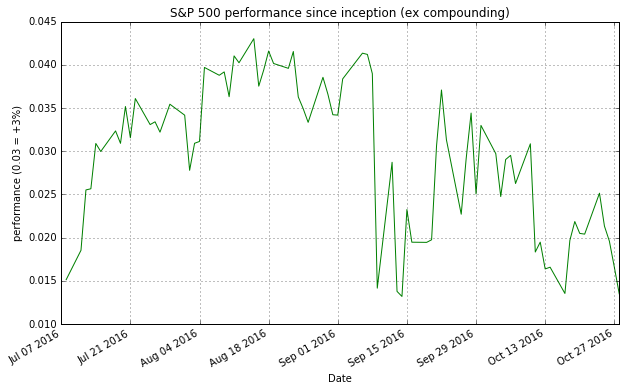

In [13]:
cumulative_GSPC_return = np.cumsum(historic_daily_returns['^GSPC'])
cumulative_GSPC_return.plot(kind='line', color='green', figsize=(10, 6))
plt.title('S&P 500 performance since inception (ex compounding)')
plt.ylabel('performance (0.03 = +3%)')
plt.grid(True)

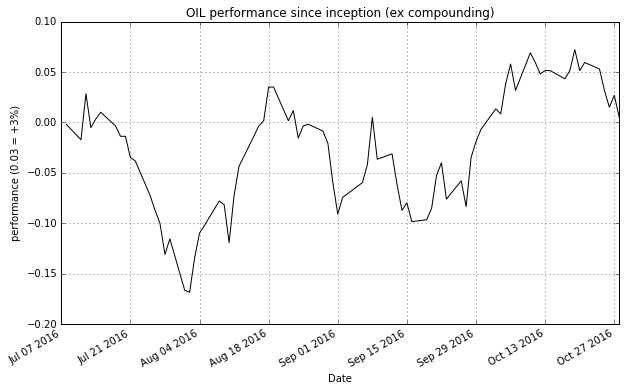

In [14]:
cumulative_oil_return = np.cumsum(historic_daily_returns['OIL'])
cumulative_oil_return.plot(kind='line', color='black', figsize=(10, 6))
plt.title('OIL performance since inception (ex compounding)')
plt.ylabel('performance (0.03 = +3%)')
plt.grid(True)

Comparative analysis of stocks

In [17]:
comparative_analysis = pd.concat([historic_daily_returns['OIL'], historic_daily_returns['^GSPC'], historic_daily_returns['JNJ'], historic_daily_returns['NXTM'], historic_daily_returns['WIZZ.L'], daily_port_return], axis=1).iloc[1:]
comparative_analysis

,OIL,^GSPC,JNJ,NXTM,WIZZ.L,Portfolio
Date,,,,,,
2016-07-08,-0.001705,0.015138,0.002771,0.047830,0.015615,-0.004026
2016-07-11,-0.015478,0.003403,0.000651,-0.001747,0.031143,0.019416
2016-07-12,0.045732,0.006985,-0.000081,-0.032440,0.015523,-0.016583
2016-07-13,-0.033673,0.000135,0.000651,0.003157,-0.000616,0.014422
2016-07-14,0.008525,0.005245,0.001462,-0.010865,0.017721,0.012036
2016-07-15,0.006768,-0.000929,-0.001462,-0.010984,-0.021427,-0.003655
2016-07-18,-0.013583,0.002379,0.001138,-0.003227,-0.025064,-0.020615
2016-07-19,-0.010309,-0.001436,0.016990,0.011019,-0.021161,0.008263
2016-07-20,0.000000,0.004261,-0.000879,0.015406,-0.011734,-0.000271


Correlation analysis

In [18]:
beta_analysis = pd.concat([historic_daily_returns['OIL'], historic_daily_returns['^GSPC'], historic_daily_returns['JNJ'], historic_daily_returns['NXTM'], historic_daily_returns['WIZZ.L'], daily_port_return], axis=1).iloc[1:]

In [19]:
np.corrcoef(beta_analysis['OIL'], beta_analysis['Portfolio'])

array([[ 1.        , -0.39559192],
       [-0.39559192,  1.        ]])

In [25]:
np.corrcoef(beta_analysis['^GSPC'], beta_analysis['Portfolio'])

array([[ 1.        , -0.30673449],
       [-0.30673449,  1.        ]])

In [26]:
#np.corrcoef(beta_analysis['^GSPC'], beta_analysis['OIL'])

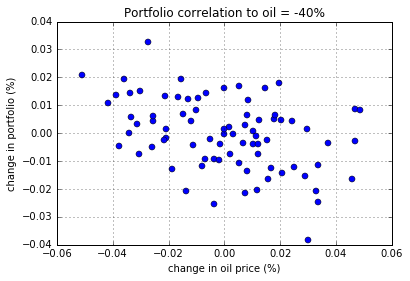

In [27]:
x = historic_daily_returns['OIL']
y = daily_port_return
plt.plot(x, y, 'bo')
plt.xlabel('change in oil price (%)')
plt.ylabel('change in portfolio (%)')
plt.title('Portfolio correlation to oil = -40%')
plt.grid(True)

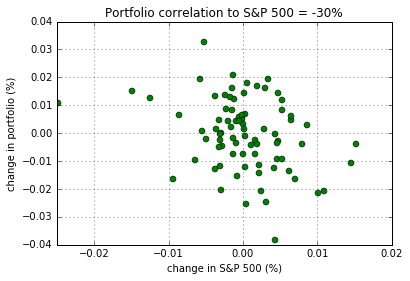

In [28]:
plt.plot(historic_daily_returns['^GSPC'], daily_port_return, 'go')
plt.xlabel('change in S&P 500 (%)')
plt.ylabel('change in portfolio (%)')
plt.title('Portfolio correlation to S&P 500 = -30%')
plt.grid(True)

Beta analysis

In [29]:
x = np.column_stack((list(beta_analysis['^GSPC'].values), list(beta_analysis['OIL'].values)))
x = sm.add_constant(x)
y = list(beta_analysis['Portfolio'].values)

#, list(beta_analysis['OIL'].values)

avalon = sm.OLS(y, x).fit()
print avalon.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     8.649
Date:                Sat, 29 Oct 2016   Prob (F-statistic):           0.000409
Time:                        14:25:49   Log-Likelihood:                 244.31
No. Observations:                  80   AIC:                            -482.6
Df Residuals:                      77   BIC:                            -475.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.178      0.8